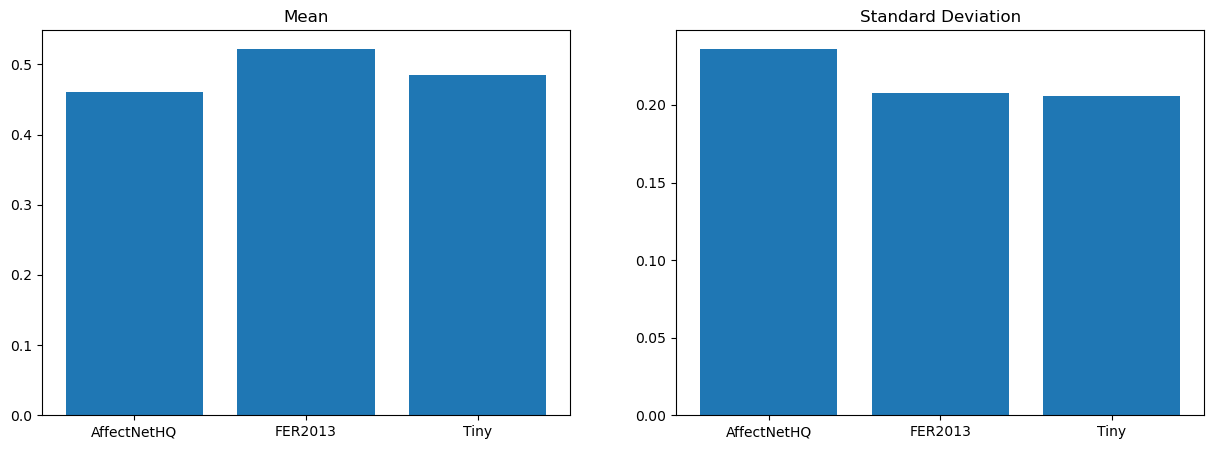

In [17]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

# Define transforms
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

# Load datasets
dataset1 = datasets.ImageFolder('/kaggle/input/finaldataset/Datasets/AffectNetHQ', transform=transform)
dataset2 = datasets.ImageFolder('/kaggle/input/finaldataset/Datasets/FER2013', transform=transform)
dataset3 = datasets.ImageFolder('/kaggle/input/finaldataset/Datasets/Tiny', transform=transform)

# Define dataloaders
dataloader1 = torch.utils.data.DataLoader(dataset1, batch_size=32, shuffle=True)
dataloader2 = torch.utils.data.DataLoader(dataset2, batch_size=32, shuffle=True)
dataloader3 = torch.utils.data.DataLoader(dataset3, batch_size=32, shuffle=True)

# Calculate mean and standard deviation
mean1, std1 = 0., 0.
mean2, std2 = 0., 0.
mean3, std3 = 0., 0.
n1, n2, n3 = 0, 0, 0

for data, _ in dataloader1:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean1 += data.mean(2).sum(0)
    std1 += data.std(2).sum(0)
    n1 += batch_samples

for data, _ in dataloader2:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean2 += data.mean(2).sum(0)
    std2 += data.std(2).sum(0)
    n2 += batch_samples

for data, _ in dataloader3:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean3 += data.mean(2).sum(0)
    std3 += data.std(2).sum(0)
    n3 += batch_samples

mean1 /= n1
std1 /= n1

mean2 /= n2
std2 /= n2

mean3 /= n3
std3 /= n3

# Plot mean and standard deviation
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].bar(['AffectNetHQ', 'FER2013', 'Tiny'], [mean1.item(), mean2.item(), mean3.item()])
axs[0].set_title('Mean')

axs[1].bar(['AffectNetHQ', 'FER2013', 'Tiny'], [std1.item(), std2.item(), std3.item()])
axs[1].set_title('Standard Deviation')

plt.show()
